# Carregar módulos, bibliotecas e o csv sobre Iris de flores.

**This program was heavily based on James Brownlee tutorial that can be found [here 
](https://machinelearningmastery.com/machine-learning-in-python-step-by-step/).**
**I'm a beginner on data science, python and ML, so feel free to give tips or suggestions for this notebook**

In [1]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.10.2 (tags/v3.10.2:a58ebcc, Jan 17 2022, 14:12:15) [MSC v.1929 64 bit (AMD64)]
scipy: 1.8.0
numpy: 1.22.2
matplotlib: 3.5.1
pandas: 1.4.1
sklearn: 1.0.2


In [21]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
...

from matplotlib.pyplot import figure

In [4]:
#Carregar o dataset usando PANDAS e nomear cada coluna
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
names = ['comprimento-sepala', 'largura-sepala', 'comprimento-petala', 'largura-petala', 'classe']
dataset = read_csv(url, names=names)

# Sumarização dos dados presentes
Nesta etapa de visualização vou chegar as características dos dados para decidir como abordar o problema:

1. Dimensões do dataset;
2. O dataset (Usar o .head);
3. Estatísticas dos dados (Esacala, range dos dados, média, ausência de dados..);
4. Distribuição pelas classes.


## Dimensões usando função .shape

In [6]:
print(dataset.shape)

(150, 5)


150 entradas com 5 classificações

## Quais são as primeiras 20 entradas:

In [8]:
print(dataset.head(20))

    comprimento-sepala  largura-sepala  comprimento-petala  largura-petala  \
0                  5.1             3.5                 1.4             0.2   
1                  4.9             3.0                 1.4             0.2   
2                  4.7             3.2                 1.3             0.2   
3                  4.6             3.1                 1.5             0.2   
4                  5.0             3.6                 1.4             0.2   
5                  5.4             3.9                 1.7             0.4   
6                  4.6             3.4                 1.4             0.3   
7                  5.0             3.4                 1.5             0.2   
8                  4.4             2.9                 1.4             0.2   
9                  4.9             3.1                 1.5             0.1   
10                 5.4             3.7                 1.5             0.2   
11                 4.8             3.4                 1.6      

## Estatística dos dados

In [10]:
print(dataset.describe())

       comprimento-sepala  largura-sepala  comprimento-petala  largura-petala
count          150.000000      150.000000          150.000000      150.000000
mean             5.843333        3.054000            3.758667        1.198667
std              0.828066        0.433594            1.764420        0.763161
min              4.300000        2.000000            1.000000        0.100000
25%              5.100000        2.800000            1.600000        0.300000
50%              5.800000        3.000000            4.350000        1.300000
75%              6.400000        3.300000            5.100000        1.800000
max              7.900000        4.400000            6.900000        2.500000


150 itens em todas as classe que são número (float ou integer), faixa de valores coerente e escala em centímetros.

## Distribuição dos dados segundo a classe

In [12]:
print(dataset.groupby('classe'). size())

classe
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# Visualização de dados
Conhecer melhor os dados utilizando plots uni e multivariaveis com o pandas e matplot.

## Univariaveis
Criar diagramas de caixa e avaliar as variações observadas.

Parâmetros do .plot:

    . kind -> boxplot para observa max, min e os quartils;
    . subplot -> True para avaliar cada variável em um plot diferente;
    . sharex -> False, sem compartilhar eixo único;
    . sharey -> False, sem compartilhar eixo único.

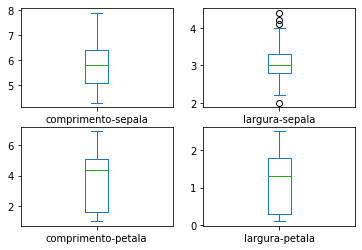

In [16]:
dataset.plot(kind='box', subplots=True, layout = (2,2), sharex=False, sharey=False)
pyplot.show()

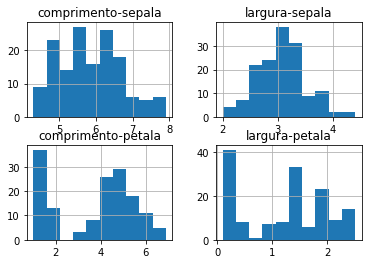

In [17]:
dataset.hist()
pyplot.show()

Largura da sepala  e comprimento da petala aparentam ter uma distribuição gaussiana. **Buscar algoritmos que possam ser uteis para Gaussiana**.

## Multivariaveis

A ideia é visualizar a relação entre as variaveis utilizando um scatterplot.

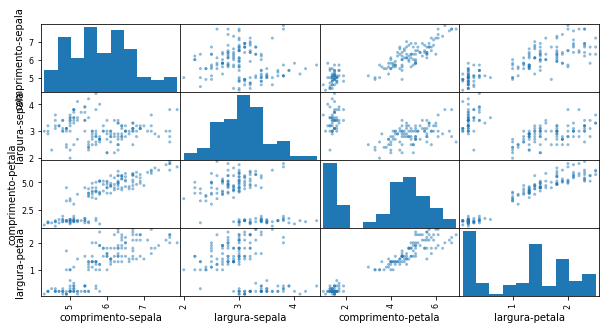

In [35]:
scatter_matrix(dataset)
pyplot.show()

É observável que algumas relações (Comprimento petala e sepala, largura e comprimento de petala..) apresentam uma diagonal, o que sugere uma correlação entre elas.

# Avaliação de algoritmos

Criar e avaliar modelos para previsão. **Estimar accuracy**.

1. Dataset de validação
2. Construção e avaliação dos modelos usando 10 k fold stratified
3. Seleção do melhor modelo


## Dataset de validação

Dividir o dataset em 2, um para treinar o modelo com 80% dos dados e outros para avaliar o modelo com 20% dos dados, onde o primeiro será **Seen** e o segundo será **Unseen**. X é inputarray, onde tem-se as variáveis, e Y outputarray, onde tem-se as classes.

In [23]:
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

## Construção dos modelos e avaliação deles
1. Regressão Logistica (LR)
2. Análise de discriminação linear (LDA)
3. K-Nearest Neighbors (KNN)
4. Arvore de regressão e classificação (CART)
5. Naive Bayes Gaussiana (NB)
6. Support Vector Machines (SVM)

In [39]:
#Montar uma lista com os modelos dentro

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Loop para avaliar os modelos
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.950000 (0.055277)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


## Seleção do melhor modelo

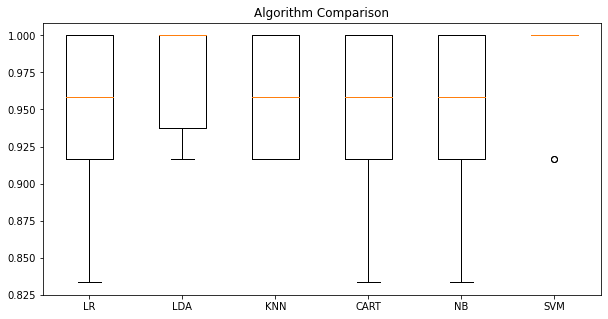

In [40]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

# Previsões (Classificação)

Conforme observado no diagrama de caixas, o SVM apresentou melhor precisão (~98%) e menor distribuição. Logo, SVM será o modelo escolhido.

In [43]:
#Previsão
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
#Avaliação da previsão

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

